# Exploratory Data Analyis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
# CONFIG


In [3]:
# Full DataFrame
df = pd.read_csv(DATA_FILE)
df

,author,repo,file,has_type,name,docstring,func_descr,arg_names,arg_types,arg_descrs,return_type,return_expr,return_descr,arg_names_len,arg_types_len
0,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,decorator,NaN,NaN,"['request', 'args']","['', '']","['', '']",NaN,"['function request args kwargs', 'http respons...",NaN,2,2
1,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,login require,NaN,NaN,['function'],[''],[''],NaN,['decorator'],NaN,1,1
2,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,decorator,NaN,NaN,"['request', 'args']","['', '']","['', '']",NaN,"['function request args kwargs', 'render reque...",NaN,2,2
3,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,group account require,NaN,NaN,['function'],[''],[''],NaN,['decorator'],NaN,1,1
4,ocf,ocfweb,./projects/ocf__ocfweb/ocfweb/auth.py,False,wrapper,NaN,NaN,"['request', 'args']","['', '']","['', '']",NaN,"['fn request args kwargs', 'http response redi...",NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478988,kobeHub,Transformer-Big-BT,./projects/kobeHub__Transformer-Big-BT/code/mo...,False,call,return output encode stack. args decoder input...,NaN,"['self', 'decoder input', 'encoder output', 'd...","['', '', '', '', '', '']","['', '', '', '', '', '']",NaN,['self output normalization decoder input'],NaN,6,6
4478989,kobeHub,Transformer-Big-BT,./projects/kobeHub__Transformer-Big-BT/code/mo...,False,init,NaN,NaN,"['self', 'vocab size', 'hidden size']","['', '', '']","['', '', '']",NaN,[],NaN,3,3
4478990,kobeHub,Transformer-Big-BT,./projects/kobeHub__Transformer-Big-BT/code/mo...,False,build,NaN,NaN,"['self', '']","['', '']","['', '']",NaN,[],NaN,2,2
4478991,kobeHub,Transformer-Big-BT,./projects/kobeHub__Transformer-Big-BT/code/mo...,False,call,get token embeddings x args x input int tensor...,get token embeddings x,"['self', 'x']","['', '']","['', 'input int tensor shape batch size length...",NaN,['embeddings'],NaN,2,2


In [5]:
df_ = df.copy()

In [43]:
# Drop all function that has no return type
df = df_


def encode_types(df):
    le = preprocessing.LabelEncoder()
    
    # All types
    return_types = df['return_type'].values
    arg_types = np.hstack(df['arg_types'].values)
    rt = np.concatenate((return_types, arg_types), axis=0)
    
    unique, counts = np.unique(rt, return_counts=True)
    print(f"Found {len(unique)} unique types in a total of {len(rt)} types.")
    
    # type we are going to keep
    print("Remapping uncommon types for functions")
    common_types = [unique[i] for i in np.argsort(counts)[::-1][:999]]
    df['return_type_t'] = df['return_type'].apply(lambda x: x if x in common_types else 'other')
    print("Remapping uncommon types for arguments")
    df['arg_types_t'] = df['arg_types'].apply(lambda x: [i if i in common_types else 'other' for i in x])
    
    print("Fitting label encoder")
    # All types transformed
    return_types = df['return_type_t'].values
    arg_types = np.hstack(df['arg_types_t'].values)
    rt = np.concatenate((return_types, arg_types), axis=0)
    le.fit(rt)
    
#     print(le.classes_)
    
    # transform all type
    print("Transforming return types")
    df['return_type_enc'] = le.transform(return_types)
    
    print("Transforming args types")
    df['arg_types_enc'] = df['arg_types_t'].apply(lambda x : le.transform(x))
    
    return df
    
def format_df(df):
    """Format all array type to real arrays"""
    df['arg_names'] = df['arg_names'].apply(lambda x: eval(x))
    df['arg_types'] = df['arg_types'].apply(lambda x: eval(x))
    df['arg_descrs'] = df['arg_descrs'].apply(lambda x: eval(x))
    df['return_expr'] = df['return_expr'].apply(lambda x: eval(x))
    
    return df

print(f"Functions before dropping on return type {len(df)}")
df = df.dropna(subset=['return_type'])
print(f"Functions after dropping on return type {len(df)}")

print(f"Functions before dropping nan return type {len(df)}")
to_drop = np.invert((df['return_type'] == 'nan') | (df['return_type'] == 'None'))
df = df[to_drop]
print(f"Functions after dropping nan return type {len(df)}")

print(f"Functions before dropping on empty docstring {len(df)}")
df = df.dropna(subset=['docstring'])
print(f"Functions after dropping on empty docstring {len(df)}")

# Format dataframe
df = format_df(df)
df = encode_types(df)

print(f"Functions before dropping on empty return expression {len(df)}")
df = df[df['return_expr'].apply(len) > 0]
print(f"Functions after dropping on empty return expression {len(df)}")

# Drop all columns useless for the ML algorithms
df = df.drop(columns=['file', 'author'])

df

Functions before dropping on return type 4478993
Functions after dropping on return type 494245
Functions before dropping nan return type 494245
Functions after dropping nan return type 302069
Functions before dropping on empty docstring 302069
Functions after dropping on empty docstring 145294
Found 8978 unique types in a total of 411482 types.
Remapping uncommon types for functions
Remapping uncommon types for arguments
Fitting label encoder
Transforming return types
Transforming args types
Functions before dropping on empty return expression 145294
Functions after dropping on empty return expression 136394


,repo,has_type,name,docstring,func_descr,arg_names,arg_types,arg_descrs,return_type,return_expr,return_descr,arg_names_len,arg_types_len,return_type_t,arg_types_t,return_type_enc,arg_types_enc
407,ppb-vector,True,bool,check whether vector non zero. assert vector a...,check whether vector non zero,[self],[],[],bool,[self],NaN,1,1,bool,[],855,[0]
408,ppb-vector,True,length,compute length vector. vector length .,compute length vector,[self],[],[],float,[hypot self x self y],NaN,1,1,float,[],885,[0]
409,ppb-vector,True,asdict,convert vector vector like dictionary. v vecto...,convert vector vector like dictionary,[self],[],[],"typing.Mapping[str, float]",[x self x y self y],NaN,1,1,other,[],922,[0]
411,ppb-vector,True,add,add two vectors. param py class vector vector ...,add two vector,"[self, other]","[, VectorLike]","[, a py class vector or a vector like. for a d...","""""""Vector""""""","[not implement, vector self x other x self y o...",NaN,2,2,other,"[, VectorLike]",922,"[0, 812]"
413,ppb-vector,True,sub,subtract one vector another. param py class ve...,subtract one vector another,"[self, other]","[, VectorLike]","[, a py class vector or a vector like. for a d...","""""""Vector""""""","[not implement, vector self x other x self y o...",NaN,2,2,other,"[, VectorLike]",922,"[0, 812]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478867,Transformer-Big-BT,True,unescape token,replace escaped character token unescaped vers...,replace escaped character token unescaped version,[token],[str],[],str,[unescape regex sub match token],NaN,1,1,str,[str],944,[944]
4478875,Transformer-Big-BT,True,write file,write line file use writer,write line file use writer,"[writer, filename, newline]","[, str, ]","[, , ]",int,[l],NaN,3,3,int,"[, str, ]",895,"[0, 944, 0]"
4478879,Transformer-Big-BT,True,merge umcorpus,merge train file u mcorpus one file,merge train file u mcorpus one file,"[raw dir, output file]","[str, str]","[, ]",int,[line],NaN,2,2,int,"[str, str]",895,"[944, 944]"
4478880,Transformer-Big-BT,True,encode and save,encode data one file tf record format save mul...,encode data one file tf record format save mul...,"[tokenizer, source input, target input, output...","[, , , , , , ]","[, , , , , , ]",List[str],"[output path, output path]",NaN,7,7,List[str],"[, , , , , , ]",424,"[0, 0, 0, 0, 0, 0, 0]"


In [35]:
df[df['return_type_t'] == 'other']

,author,repo,has_type,name,docstring,func_descr,arg_names,arg_types,arg_descrs,return_type,return_expr,return_descr,arg_names_len,arg_types_len,return_type_t
409,ppb,ppb-vector,True,asdict,convert vector vector like dictionary. v vecto...,convert vector vector like dictionary,[self],[],[],"typing.Mapping[str, float]",[x self x y self y],NaN,1,1,other
411,ppb,ppb-vector,True,add,add two vectors. param py class vector vector ...,add two vector,"[self, other]","[, VectorLike]","[, a py class vector or a vector like. for a d...","""""""Vector""""""","[not implement, vector self x other x self y o...",NaN,2,2,other
413,ppb,ppb-vector,True,sub,subtract one vector another. param py class ve...,subtract one vector another,"[self, other]","[, VectorLike]","[, a py class vector or a vector like. for a d...","""""""Vector""""""","[not implement, vector self x other x self y o...",NaN,2,2,other
415,ppb,ppb-vector,True,scale by,compute vector scalar multiplication. vector s...,compute vector scalar multiplication,"[self, scalar]","[, typing.SupportsFloat]","[, ]","""""""Vector""""""",[vector scalar self x scalar self y],NaN,2,2,other
422,ppb,ppb-vector,True,truediv,perform division vector scalar. vector vector . .,perform division vector scalar,"[self, other]","[, typing.SupportsFloat]","[, ]","""""""Vector""""""",[vector self x other self y other],NaN,2,2,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466639,adbpy,wire-protocol,True,a byte,ensure give data payload class bytes instance....,ensure give data payload class bytes instance,"[data, encode, error]","[hints.Buffer, hints.Str, hints.Str]","[data payload, optional encoding if data paylo...",hints.Bytes,"[data, data encode encoding error, data tobytes]",data payload byte,3,3,other
4466782,Alonecmj,sublime-config,True,status,return callback status,return callback status,[self],[],[],enum.Enum,[self status],NaN,1,1,other
4466793,Alonecmj,sublime-config,True,generate,generate tooltip give text,generate tooltip give text,"[self, tooltip, content]","[, str, Dict[str, str]]","[, , ]","Union[Dict[str, str], None]","[data, none]",NaN,3,3,other
4466951,Alonecmj,sublime-config,True,ready to read,return back handler ready read,return back handler ready read,[self],[],[],List['EventHandler'],[h for h in self. handler pool value if h read...,NaN,1,1,other


In [51]:
sum(df['name'] == '71')

0

In [ ]:
df.dtypes

In [ ]:
df_

## Analysis of docstring

#### Questions:
    - What is the distribution fo the docstring length
    - How many functions have docstrings?

In [ ]:
df['docstring_length'] = df['docstring'].fillna('').apply(len)
df['docstring_length'].describe()

In [ ]:
from scipy import stats
outliars = np.abs(stats.zscore(df['docstring_length'])) > 3 # zscore > 3


In [ ]:
dd = df['docstring_length'][(df['docstring_length'] > 0) & np.invert(outliars)]
bins = 400

fig = plt.figure(figsize=(15, 9))
fig.suptitle("Distribution of docstring lengths", fontsize=16)

plt.subplot(2, 1, 1)
plt.title("Distribution only for range 0-200")
plt.hist(dd, bins, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 200])

plt.subplot(2, 1, 2)
plt.title("Distribution for full range")
plt.hist(dd, bins, density=True, facecolor='g', alpha=0.75)
plt.xlim([0, 1000])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

## Analysis of arg-{types, names}

#### Questions: 
    - How many functions have types? What is the ration of the total
    - What is the distribution of the function arguments?
    - What are the most common arg types?


In [8]:
with_type = df['has_type']
print(f"Function with type {with_type.sum()}/{len(df)}={with_type.sum()/len(df):0.3f}")

Function with type 136394/136394=1.000


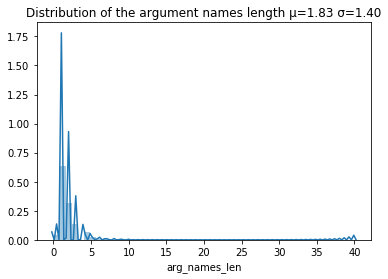

In [9]:
sns.distplot(df['arg_names_len'])
plt.title(f"Distribution of the argument names length \u03BC={df['arg_names_len'].mean():0.2f}" \
          f" σ={df['arg_names_len'].std():0.2f}")
plt.show()

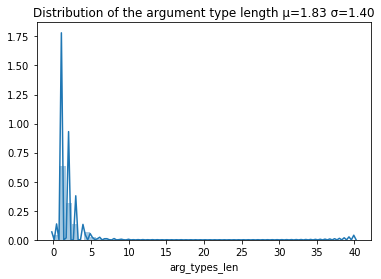

In [10]:
sns.distplot(df['arg_types_len'])
plt.title(f"Distribution of the argument type length \u03BC={df['arg_types_len'].mean():0.2f}" \
          f" σ={df['arg_types_len'].std():0.2f}")
plt.show()

In [11]:
all_types = np.hstack(df['arg_names'].values)
unique, counts = np.unique(all_types, return_counts=True)
print(f"A total of {len(unique)} unique names were gathered.")

print(f"Most common argument names are:")
for i in np.argsort(counts)[-20:][::-1]:
    print(f"-- {unique[i]}     \t\t\t{counts[i]}")

A total of 16242 unique names were gathered.
Most common argument names are:
-- self     			79371
-- ha     			3403
-- cl     			3139
-- value     			2814
-- name     			2130
-- data     			2091
-- args     			2008
-- request     			1954
-- config     			1811
-- path     			1585
-- key     			1472
-- node     			1430
-- state     			1062
-- other     			1044
-- token     			842
-- x     			831
-- user id     			807
-- target     			776
-- text     			742
-- context     			740


In [29]:
all_types = np.hstack(df['arg_types'].values)
unique, counts = np.unique(all_types, return_counts=True)
print(f"A total of {len(unique)} unique types were gathered.")

print(f"Most common argument types are:")
for i in np.argsort(counts)[::-1][1:]:
    print(f"-- {unique[i]}      \t\t\t{counts[i]}")

A total of 8978 unique types were gathered.
Most common argument types are:
-- str      			39226
-- int      			14669
-- bool      			8451
-- float      			5807
-- Any      			4618
-- Optional[str]      			3048
-- torch.Tensor      			2722
-- List[str]      			2719
-- Dict[str, Any]      			2261
-- np.ndarray      			1642
-- mx.sym.Symbol      			1629
-- dict      			1418
-- HomeAssistant      			1409
-- Dict      			1358
-- bytes      			1314
-- torch.LongTensor      			1130
-- Optional[int]      			1032
-- Callable      			1023
-- List[int]      			853
-- Request      			806
-- Dict[str, torch.LongTensor]      			788
-- Type      			731
-- HomeAssistantType      			716
-- ConfigType      			671
-- Dict[str, str]      			623
-- Path      			559
-- list      			559
-- Optional[float]      			512
-- List[Dict[str, Any]]      			500
-- List      			484
-- SafeLineLoader      			481
-- yaml.nodes.Node      			481
-- sublime.View      			456
-- Dict[str, torch.Tensor]      			452
-- Option

-- Optional[domain.User]      			2
-- """VizConfig"""      			2
-- Optional[SchemaTypeOrStr]      			2
-- Optional[List[Optional[List[str]]]]      			2
-- Optional[List[Optional[Dict[str, Any]]]]      			2
-- Optional[Scope]      			2
-- Mapping[str, Union[_Q, float]]      			2
-- EntityCollection      			2
-- t.Optional[t.List[t.Any]]      			2
-- Optional[RunShellCommandLogSettings]      			2
-- ETHPeer      			2
-- Organ      			2
-- OrderSide      			2
-- typing.Optional[inspect.Parameter]      			2
-- Optional[httpclient.AsyncHTTPClient]      			2
-- Optional[Log]      			2
-- t.Optional[t.MutableMapping[str, str]]      			2
-- Ordertype      			2
-- Forbidden      			2
-- Forecast      			2
-- List[rclone.RcloneItem]      			2
-- tx.Iterable[tx.TypeVar]      			2
-- ForkStartBlocks      			2
-- Map[Domain, Iterable[Range]]      			2
-- Organization      			2
-- FieldType      			2
-- """Vector3"""      			2
-- Form      			2
-- Optional[ReturningType]      			2
-- Optional[Rubric

-- Union[Exception, GraphQLError]      			1
-- Union[EnumValueDefinitionNode, FieldDefinitionNode]      			1
-- Union[Dict, List, float, bytes, str]      			1
-- Union[Dict[str, Any], List[Dict[str, Any]]]      			1
-- Union[Dict, List, str]      			1
-- Union[DictLike, Iterable[DictLike]]      			1
-- Union[Dict[Call, float], Iterable[Call]]      			1
-- Union[Dict[Index, Callable], None]      			1
-- Union[Dict[Index, FeatureRange], None]      			1
-- Union[Dict[Index, float], None]      			1
-- Union[Dict[UnnamedOpetope.Address, str], str]      			1
-- Union[Dict[int, List[Tuple[str, str]]]]      			1
-- Union[Dict[str, Any], MultiDict]      			1
-- Union[Enactment, Factor]      			1
-- Union[Dict[str, Any], yaml.YAMLObject]      			1
-- Union[Dict[str, IO[bytes]], None]      			1
-- Union[Dict[str, str], Iterable[str]]      			1
-- Union[Dict[str, str], List[Dict[str, str]]]      			1
-- Union[DocumentSet, Document]      			1
-- Union[EccKey, RsaKey, str]      			1
-- Union[EccKey,

# Checks

In [ ]:
# Arguments should always be equal to type len
(df['arg_types_len'] == df['arg_names_len']).sum() == len(df)

In [ ]:
# If not which are the rows in question
df[df['arg_types_len'] != df['arg_names_len']]

In [18]:
unique[0]

''

In [31]:
np.argsort(counts)

array([4488, 4969, 4963, ..., 7849, 8210,    0])